# Customer Segment Analysis Using PCA

In this example, we'll use PCA to reduce the dimensionality of the a dataset of customers for one of our data analytics clients, and then compare that result to the segmentation of the data using all of the factors.

In [3]:
# Import the modules
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Read in the CSV file as `customers_transformed_df`  and prepare the Pandas DataFrame

In [4]:
# Read the csv file into a pandas DataFrame
customer_path = Path('../Resources/customers.csv')
customers_transformed_df = pd.read_csv(customer_path)

# Review the DataFrame
customers_transformed_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,1.148534,4.606077,2.699069,-2.661824,1.526433,1.236671,0.211421,1.482896,-4.445627,-1.936831
1,-1.149410,-1.650549,2.530167,-3.227088,0.572138,4.162600,-0.291679,-1.237575,3.604765,-1.635689
2,0.332427,-0.887985,-0.309216,0.399891,0.828492,3.641945,-0.916946,-1.978024,1.056772,-1.882747
3,2.245599,3.826309,0.264039,0.095471,1.984380,0.373991,-0.280279,1.602786,-5.993331,-2.258925
4,0.705503,-1.312329,0.895406,-0.405408,1.116187,3.699562,-1.427985,-1.494409,1.156908,-1.434964


## Part 1: Use PCA to reduce the dimensionality of the transformed customers DataFrame to 2 principal components

### Step 1: Import the PCA module from SKLearn

In [5]:
# Import the PCA module
from sklearn.decomposition import PCA

### Step 2: Instantiate the instace of the PCA model declaring the number of principal components as 2

In [7]:
# Instantiate the PCA instance and declare the number of PCA variables
pca = PCA(n_components=2)

### Step 3: Using the `fit_transform` function from PCA, fit the PCA model to the `customers_transformed_df` DataFrame. Review the first 5 rows of list data.

In [8]:
# Fit the PCA model on the transformed credit card DataFrame
pca_df = pca.fit_transform(customers_transformed_df)

# Review the first 5 rows of the array of list data
pca_df[:5]

array([[-4.72382358, -0.60489964],
       [ 5.85571568, -1.98331135],
       [ 2.43063042, -3.15456594],
       [-6.96050326, -1.35772617],
       [ 2.47746793, -3.29412896]])

### Step 4: Using the `explained_variance_ratio_` function from PCA, calculate the percentage of the total variance that is captured by the two PCA variables.  

In [9]:
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([0.55083554, 0.30256389])

**Question:** What is the explained variance ratio captured by the two PCA variables?
    
**Answer:** The ratio captured by the two PCA variables is approximately 85%

### Step 5: Using the `customer_pca` data, create a Pandas DataFrame called `customers_pca_df`. The columns of the DataFrame should be called "PCA1" and "PCA2".

In [10]:
# Create the PCA DataFrame
customers_pca_df = pd.DataFrame(pca_df, columns=['PCA1','PCA2'])

# Review the PCA DataFrame
customers_pca_df.head()

,PCA1,PCA2
0,-4.723824,-0.604900
1,5.855716,-1.983311
2,2.430630,-3.154566
3,-6.960503,-1.357726
4,2.477468,-3.294129


## Part 2: Using the `customers_pca_df` Dataframe, utilize the elbow method to determine the optimal value of k.

In [11]:
# Create a list to store inertia values and the values of k
inertia = []
k = list(range(1,11))

In [12]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(customers_pca_df)
    inertia.append(kmeans.inertia_)

In [15]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {'k':k,'inertia':inertia}

# Create the DataFrame from the elbow data
elbow_df = pd.DataFrame(elbow_data)

# Review the DataFrame
elbow_df.head()

,k,inertia
0,1,49585.714978
1,2,23750.955470
2,3,8773.172935
3,4,6840.237425
4,5,5378.897735


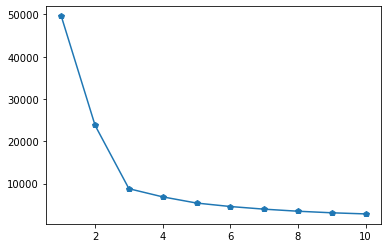

In [17]:
# Plot the DataFrame
plt.plot(k,inertia,marker='p')
plt.show()

## Part 3: Segment the `customers_pca_df` DataFrame using the K-means algorithm.

In [18]:
# Define the model Kmeans model using the optimal value of k for the number of clusters.
kmeans = KMeans(n_clusters=3, random_state=1)

# Fit the model
model_3 = kmeans.fit(customers_pca_df)

# Make predictions
predictions = kmeans.predict(customers_pca_df)

# Add a class column with the labels
customers_pca_df['clusters_3'] = predictions

customers_pca_df.head()

,PCA1,PCA2,clusters_3
0,-4.723824,-0.604900,1
1,5.855716,-1.983311,0
2,2.430630,-3.154566,0
3,-6.960503,-1.357726,1
4,2.477468,-3.294129,0


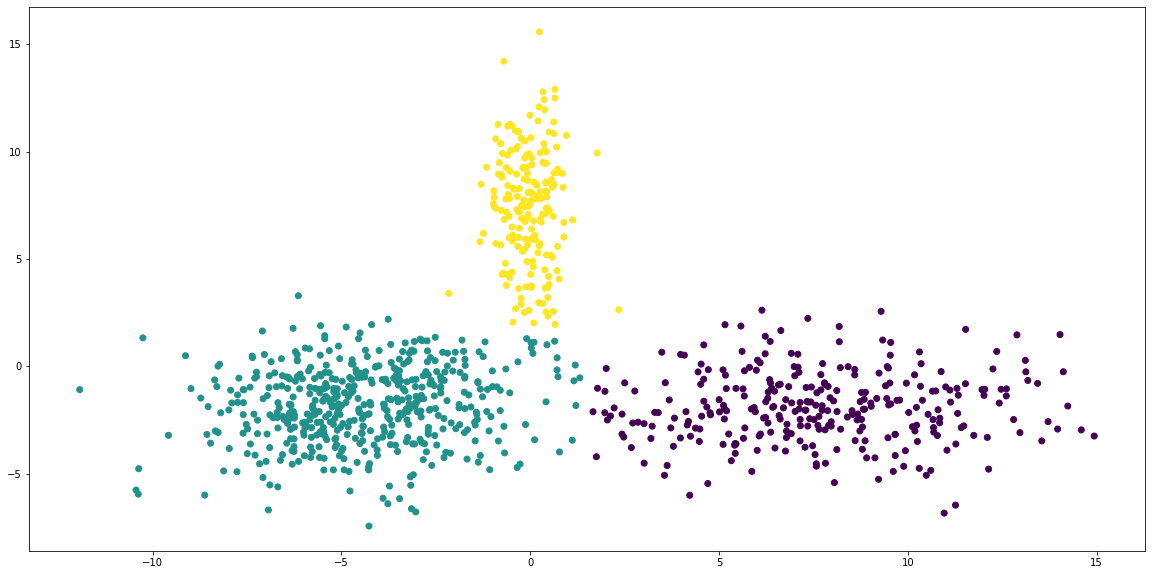

In [19]:
# Plot the clusters
x = customers_pca_df['PCA1']
y = customers_pca_df['PCA2']

plt.figure(figsize=(20,10))
plt.scatter(x,y,c=customers_pca_df['clusters_3'])
plt.show()

## Part 4: Segment the `customers_transformed_df` DataFrame with all factors using the K-means algorithm

In [20]:
# Define the model Kmeans model using k=3 clusters
kmeans = KMeans(n_clusters=3, random_state=1)

# Fit the model
model_three = kmeans.fit(customers_transformed_df)

# Make predictions
predictions_original = kmeans.predict(customers_transformed_df)

# Add a class column with the labels
customers_transformed_df['clusters_3'] = predictions_original

customers_transformed_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,clusters_3
0,1.148534,4.606077,2.699069,-2.661824,1.526433,1.236671,0.211421,1.482896,-4.445627,-1.936831,1
1,-1.149410,-1.650549,2.530167,-3.227088,0.572138,4.162600,-0.291679,-1.237575,3.604765,-1.635689,0
2,0.332427,-0.887985,-0.309216,0.399891,0.828492,3.641945,-0.916946,-1.978024,1.056772,-1.882747,0
3,2.245599,3.826309,0.264039,0.095471,1.984380,0.373991,-0.280279,1.602786,-5.993331,-2.258925,1
4,0.705503,-1.312329,0.895406,-0.405408,1.116187,3.699562,-1.427985,-1.494409,1.156908,-1.434964,0


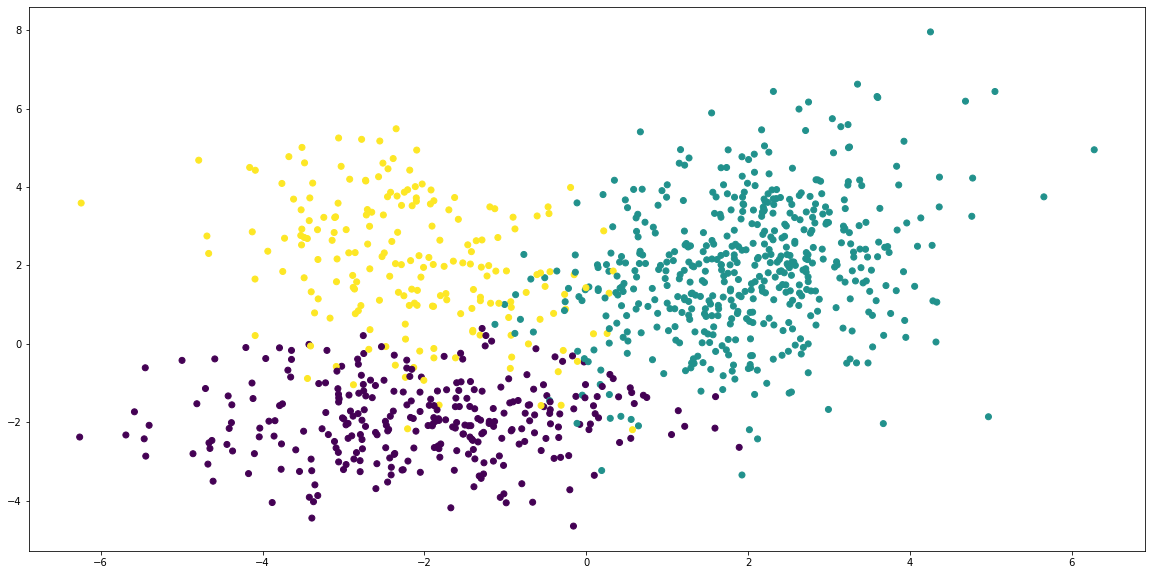

In [21]:
# Plot the clusters using the age and spending columns
x = customers_transformed_df['feature_1']
y = customers_transformed_df['feature_2']

plt.figure(figsize=(20,10))
plt.scatter(x,y,c=customers_transformed_df['clusters_3'])
plt.show()

## Part 5: Compare the segmentation results between the PCA DataFrame and the full-factored DataFrame

**Answer:** It appears that the customer segmentation information using the DataFrame with all of the factors yielded similar results to that of the PCA analysis. The data is grouped in clear customer segments in both cases.